### 가능도: 이항분포

### 사전분포: 베타분포
- 무정보 사전분포를 사용한다
- 전환율에 대해 사전 지식이 없을 경우
- Frequentist가 추정하는 값과 같은 결과를 내고 싶을 경우, 즉 데이터만으로 모수를 추정하고 싶을 경우
- 사후 분포(Posterior Distribution)를 구했을 때, 그 형태가 사전 분포와 같은 분포일 때 켤레성을 띤다고 말합니다.

In [1]:
from scipy import stats

# 데이터 담기
design_A = [16.4, 12.6, 17.5, 18.8, 12.1, 13.2, 14.5, 12.4, 17.5, 25.4, 9.3, 10.4]
design_B = [12.1, 11.8, 14.7, 13.1, 13.8, 10.1, 9.1, 13.5, 11.2, 13.7]

# 검정 코드 실시
stats.ttest_ind(design_A,
                design_B,
                equal_var=False)

Ttest_indResult(statistic=1.933374622222914, pvalue=0.07227304704557012)

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency


def click_abtest(a_click, total_a, b_click, total_b):

    click = [a_click, b_click] # A와 B의 클릭한 유저 수
    no_click = [total_a - a_click, total_b - b_click]  # A와 B의 클릭 안 한 유저 수
    cont_table = pd.DataFrame([click, no_click], columns=['A', 'B'], index=['click', 'no_click'])
    chi2, p_val, d_f, expected = chi2_contingency([click, no_click])

    print("카이제곱 통계량 :", format(chi2, '.5f'))
    print("pvalue :", format(p_val, '.5f'))

# A의 클릭수(13)와 A의 데이터 전체 개수(244), B의 클릭수(23)와 A의 데이터 전체 개수(287)를 정의한 클래스에 넣어줍니다.
click_abtest(13, 244, 23, 287)

카이제곱 통계량 : 1.11053
pvalue : 0.29197


In [ ]:
#플랫폼 a/b테스트, 지역별, 요일별, 성별, 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

In [3]:
FILES_DIR = './files/'
events = pd.read_csv(FILES_DIR + 'sampled_events.csv')
product = pd.read_csv(FILES_DIR + 'sampled_products.csv')
users = pd.read_csv(FILES_DIR + 'sampled_users.csv')

In [5]:
events.columns

Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'operating_system_version', 'country',
       'region', 'platform'],
      dtype='object')

In [11]:
events_df = events.copy()

In [18]:
events_df['platform'].unique()

array(['ANDROID', 'IOS'], dtype=object)

In [22]:
# purchase_success

# ANDROID_df = events_df[events_df['platform'] == 'ANDROID']
print(len(ANDROID_df))
print(len(ANDROID_df[ANDROID_df['event_name'] == 'purchase_success']))

1639001
112680


In [23]:
IOS_df = events_df[events_df['platform'] == 'IOS']
print(len(IOS_df))
print(len(IOS_df[IOS_df['event_name'] == 'purchase_success']))

4241406
352573


In [31]:
IOS_df['']

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
7,51e532874f90dab899c49af4879ecf7f,2021-06-03 13:00:07.587007,click_item,XGWFA1R2j8fYuTtXtqZeYA==,0vDhvLhz4x0O9JEBcKKM7Q==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeonggi-do,IOS
8,cfe9327fb78aadd4d026393c8f9c4d23,2021-06-03 13:00:07.67,click_item,Wqc/gOBz6p7HfixEWz1sFA==,ooAq5RN+obufWApeJjuLyA==,mobile,Apple,iPhone,NaN,iOS 14.4,South Korea,Seoul,IOS
9,0e4dbb5fff92188b11ae22bcfe8701be,2021-06-03 13:00:08.206,click_item,YnTSlZVYHcFeKnqudoPQsA==,rcEtYC82LQr23CPrfx/JHw==,mobile,Apple,iPhone,NaN,iOS 14.5.1,South Korea,Ulsan,IOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880400,0f05e84bc654d358a399384fdd42cdd0,2021-08-04 12:59:52.077017,click_item,aUjb4yTjbEw+MgeWd1y17A==,Uu/yrhZReFMVY4lZiX+Gcw==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeonggi-do,IOS
5880402,dd2a71d30af7c856b61223bd45b54dbe,2021-08-04 12:59:53.129054,click_item,ROKDMwVDKbb9N82CptJ9dg==,xKvqk3vRvFLpCTQTqpL4ew==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS
5880403,1006525137f948b588322af3ffe4f7ec,2021-08-04 12:59:56.151,click_item,0nfvwBd9Qriig0lIgvtiBA==,1qWgJ5SJvbi5+mBYGH848A==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS
5880404,5ca46d4d8ffc29bad42d8b6fc830e364,2021-08-04 12:59:56.952028,click_item,Z0a8cvN+t0V2WInGzjkM5Q==,M9ucsQ4dNX/t1Bopo599BA==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeonggi-do,IOS


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency


def click_abtest(a_click, total_a, b_click, total_b):

    click = [a_click, b_click] # A와 B의 클릭한 유저 수
    no_click = [total_a - a_click, total_b - b_click]  # A와 B의 클릭 안 한 유저 수
    cont_table = pd.DataFrame([click, no_click], columns=['A', 'B'], index=['click', 'no_click'])
    chi2, p_val, d_f, expected = chi2_contingency([click, no_click])

    print("카이제곱 통계량 :", format(chi2, '.5f'))
    print("pvalue :", format(p_val, '.5f'))

# A의 클릭수(13)와 A의 데이터 전체 개수(244), B의 클릭수(23)와 A의 데이터 전체 개수(287)를 정의한 클래스에 넣어줍니다.
click_abtest(112680, 1639001, 352573, 4241406)

카이제곱 통계량 : 3353.68673
pvalue : 0.00000


In [33]:
from scipy import stats as st 

visit_A = 1639001
visit_B = 4241406

conversion_A = 112680
conversion_B = 352573

alpha = 1
beta  = 1
n_samples = 1000000
print(alpha)

posterior_A = st.beta(alpha+conversion_A,beta+visit_A-conversion_A)
posterior_B = st.beta(alpha+conversion_B,beta+visit_B-conversion_B)
posterior_samples_A = st.beta(alpha+conversion_A,beta+visit_A-conversion_A).rvs(n_samples)
posterior_samples_B = st.beta(alpha+conversion_B,beta+visit_B-conversion_B).rvs(n_samples)

# posterior mean 
print((posterior_samples_A > posterior_samples_B).mean())

1
0.0


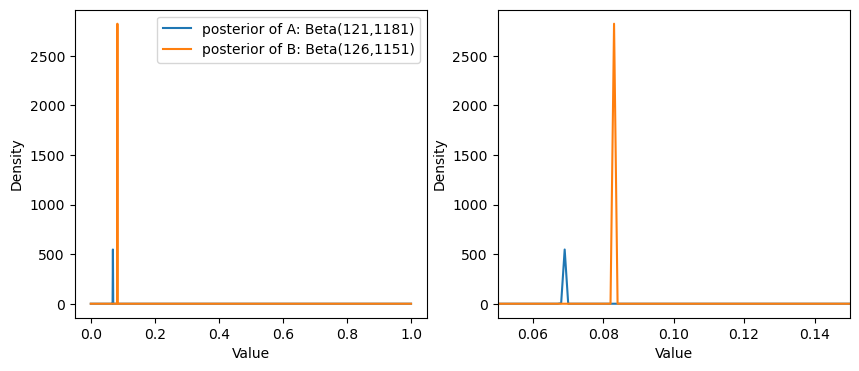

In [34]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
x = np.linspace(0,1,1000)
i=0
for ax in axes:
    ax.plot(x, posterior_A.pdf(x), label = "posterior of A: Beta(121,1181)")
    ax.plot(x, posterior_B.pdf(x), label = "posterior of B: Beta(126,1151)")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    if i==1:
        ax.set_xlim(0.05, 0.15)
    i+=1
axes[0].legend()